In [72]:
import ipyvolume.pylab as p3
import pandas as pd
import laspy
import pdal
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [73]:
#### FUSE TO LAS ####

def FuseToLas (pathFuse,pathLasRef):
    
    rfile= pathFuse
    cloud = open(rfile).readlines()
    hdr = laspy.header.Header()
    outfile = laspy.file.File(pathLasRef, mode="w", header=hdr)
    allx=[]
    ally=[]
    allz=[]
    
    for line in cloud[:50000]:
        lines = line.split(" ")
        allx.append(float(lines[0]))
        ally.append(float(lines[1]))
        allz.append(float(lines[2]))
        
    xmin = np.floor(np.min(allx))
    ymin = np.floor(np.min(ally))
    zmin = np.floor(np.min(allz))
    
    outfile.header.offset = [xmin,ymin,zmin]
    outfile.header.scale = [0.000001,0.000001,0.000001]
    
    outfile.x =np.array(allx)
    outfile.y =np.array(ally)
    outfile.z=np.array(allz)

    outfile.close()
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(allx, ally, allz)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()



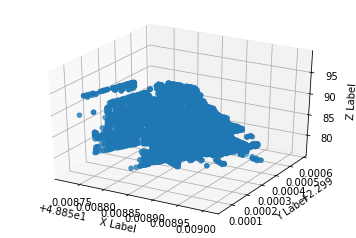

In [74]:
#### TEST CONVERT FuseToLas -- DISPLAY FROM THE FUSE FILE #####
pathFuse= "/FuseToLas/pointcloud.fuse"
pathLasRef= "/FuseToLas/simple.las"
FuseToLas (pathFuse,pathLasRef)

In [75]:
#### READING THE LAS FILE "the output" #####

filename='/FuseToLas/simple.las'
pip= {
    "pipeline": [
        {
            "type" : "readers.las",
            "filename" : filename
        },
    ]
}

pipeline = pdal.Pipeline(json.dumps(pip))
pipeline.validate()
get_ipython().run_line_magic('time', 'n_points = pipeline.execute()')
print('Pipeline selected {} points ({:.1f} pts)'.format(n_points, n_points))

CPU times: user 20.6 ms, sys: 24 µs, total: 20.6 ms
Wall time: 21.3 ms
Pipeline selected 50000 points (50000.0 pts)


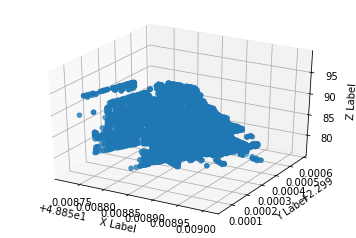

Well Done.


In [77]:
#### DISPLAY FROM THE LAS FILE #####
arr2 = pipeline.arrays[0]
#print (len(arr2))
#print(arr2)
description = arr2.dtype.descr
cols = [col for col, __ in description]
df = pd.DataFrame({col: arr2[col] for col in cols})
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

print("Well Done.")